In [1]:
project_path="/Users/vijinimallawaarachchi/Documents/Data/CF/"

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Get lung function

In [3]:
lf_df = pd.read_csv('../lung_function.csv', sep=',')

lf_df['FEV1/best FEV1'] = lf_df['FEV1/best FEV1'].fillna(0)

lf_df

,unique_ID,FEV1/best FEV1
0,1068841_20180306_S,0.969388
1,1085876_20180227_S,0.955224
2,1128691_20171206_S,0.878788
3,1128691_20171218_S,0.939394
4,1128691_20180116_S,0.818182
...,...,...
158,896213_20180427_S,0.925234
159,913873_20180417_S,0.816327
160,913873_20180423_S,1.000000
161,980574_20180403_S,0.971014


# Get phage edges

In [4]:
phages = ['edge_6506', 'edge_6873', 'edge_10818', 'edge_12391', 'edge_12907', 'edge_14329', 'edge_15814',
          'edge_17449', 'edge_18497', 'edge_25866', 'edge_25979', 'edge_26070']

# phages = ['edge_25979']

phage_sp = {'edge_6506':'Streptococcus phage 1', 
            'edge_6873':'Streptococcus phage 2', 
            'edge_10818':'Streptococcus phage 3', 
            'edge_12391':'Unknown phage 1', 
            'edge_12907':'Uncultured phage cr124_1', 
            'edge_14329':'Bacillus phage 1', 
            'edge_15814':'Streptococcus phage 4',
            'edge_17449':'Staphylococcus phage 1', 
            'edge_18497':'Staphylococcus phage 2', 
            'edge_25866':'Unknown phage 2', 
            'edge_25979':'Viji phage', 
            'edge_26070':'Streptococcus phage 5'}


# Get coverages of edges

In [5]:
coverage_df = pd.read_csv(project_path+'coverage.tsv', sep='\t')
coverage_df = coverage_df.loc[coverage_df['Contig'].isin(phages)]
coverage_df = coverage_df.set_index('Contig')
coverage_df

,edges.fasta/634207_20180510_S_good_out_R1.fastq RPKM,edges.fasta/825012_20171129_S_good_out_R1.fastq RPKM,edges.fasta/1690154_20180406_S_good_out_R1.fastq RPKM,edges.fasta/768745_20190228_BAL_good_out_R1.fastq RPKM,edges.fasta/768745_20171206_S_good_out_R1.fastq RPKM,edges.fasta/698564_20171001_S_good_out_R1.fastq RPKM,edges.fasta/1128691_20180116_S_good_out_R1.fastq RPKM,edges.fasta/717449_20180606_S_good_out_R1.fastq RPKM,edges.fasta/825012_20171206_S_good_out_R1.fastq RPKM,edges.fasta/1723809_20180227_S_good_out_R1.fastq RPKM,...,edges.fasta/1447437_20171006_S_good_out_R1.fastq RPKM,edges.fasta/658355_20180301_S_good_out_R1.fastq RPKM,edges.fasta/1593967_20180424_S_good_out_R1.fastq RPKM,edges.fasta/788707_20180313_S_good_out_R1.fastq RPKM,edges.fasta/676138_20171001_S_good_out_R1.fastq RPKM,edges.fasta/788707_20181126_S_good_out_R1.fastq RPKM,edges.fasta/785991_20171213_S_good_out_R1.fastq RPKM,edges.fasta/1128691_20171218_S_good_out_R1.fastq RPKM,edges.fasta/673895_20180122_S_good_out_R1.fastq RPKM,edges.fasta/752797_20180306_S_good_out_R1.fastq RPKM
Contig,,,,,,,,,,,,,,,,,,,,,
edge_6506,0.000000,27.603165,0.000000,0.0000,0.000000,0.000000,0.392607,0.139431,0.967527,3.639059,...,0.000000,0.103386,0.399537,0.187320,0.000,6.883304,13.334975,0.000000,0.131571,0.000000
edge_6873,0.022592,0.000000,0.000000,0.0000,0.386182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.104503,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
edge_10818,0.578909,0.000000,3.070474,0.0000,0.797714,0.000000,0.000000,0.768632,0.046889,0.088180,...,0.150268,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.054691
edge_12391,1.444859,2.171898,0.000000,0.0000,0.711043,0.000000,0.000000,0.189247,0.650350,0.037632,...,0.000000,0.000000,0.072305,0.000000,0.000,0.273775,8.412570,0.354269,0.000000,0.671032
edge_12907,0.000000,0.000000,2.127179,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016662,0.000000,0.000000,0.000000,0.000,0.113811,0.000000,0.000000,0.000000,0.000000
edge_14329,0.131437,0.000000,0.000000,0.0000,0.859191,0.000000,0.000000,0.462610,0.963034,0.000000,...,0.000000,0.000000,0.000000,12.701882,0.000,1.756753,0.000000,0.000000,0.000000,0.000000
edge_15814,0.017052,2.518430,0.083716,0.0000,0.666256,0.000000,0.000000,0.000000,0.000000,0.480001,...,0.774598,0.289267,0.027947,0.720649,0.000,0.000000,0.296679,0.054772,0.000000,0.000000
edge_17449,0.000000,0.000000,0.050685,0.0000,0.020169,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.206345,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
edge_18497,0.000000,2.970477,0.222172,0.0000,0.000000,0.512946,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.374439,0.041992,1.162869,0.000000,0.079805


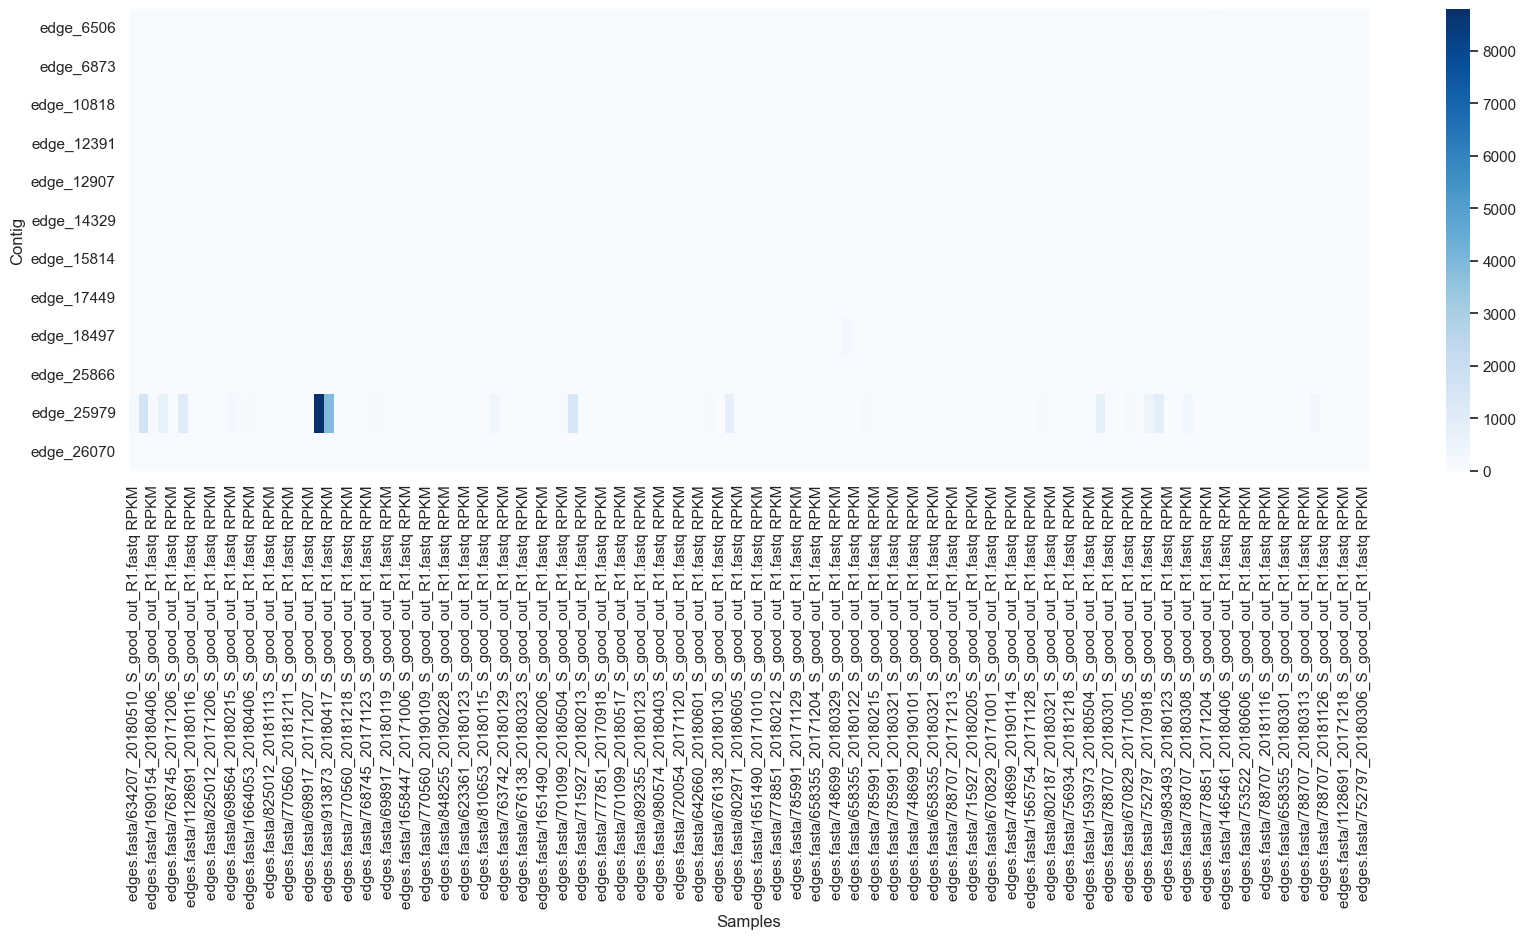

In [6]:
sns.set(rc = {'figure.figsize':(20,6)})

ax = sns.heatmap(coverage_df, cmap='Blues')
ax.set(xlabel="Samples")
ax.tick_params(left=False, bottom=False)
fig = ax.get_figure()
fig.savefig(project_path+"phage_contig_heatmap.png", format='png', dpi=300, bbox_inches='tight')


# Interesting phage

In [7]:
coverage_df = pd.read_csv(project_path+'coverage.tsv', sep='\t')
coverage_df = coverage_df.loc[coverage_df['Contig'].isin(phages)]

cols = list(coverage_df.columns)

for index, row in coverage_df.iterrows():
    if row['Contig'] == "edge_25979":
#         print(row.values)
        for col in cols[1:]:
#             if row[col] > 1000:
#                 continue
#             elif row[col] > 500:
#                 print(col)
            print(col, "\t", row[col])
                
    

edges.fasta/634207_20180510_S_good_out_R1.fastq RPKM 	 127.998985
edges.fasta/825012_20171129_S_good_out_R1.fastq RPKM 	 1675.9608
edges.fasta/1690154_20180406_S_good_out_R1.fastq RPKM 	 44.72105
edges.fasta/768745_20190228_BAL_good_out_R1.fastq RPKM 	 699.0175
edges.fasta/768745_20171206_S_good_out_R1.fastq RPKM 	 74.55061
edges.fasta/698564_20171001_S_good_out_R1.fastq RPKM 	 1055.3195
edges.fasta/1128691_20180116_S_good_out_R1.fastq RPKM 	 35.63328
edges.fasta/717449_20180606_S_good_out_R1.fastq RPKM 	 45.42333
edges.fasta/825012_20171206_S_good_out_R1.fastq RPKM 	 19.163351
edges.fasta/1723809_20180227_S_good_out_R1.fastq RPKM 	 28.264217
edges.fasta/698564_20180215_S_good_out_R1.fastq RPKM 	 235.01456
edges.fasta/768745_20190228_S_good_out_R1.fastq RPKM 	 38.258556
edges.fasta/1664053_20180406_S_good_out_R1.fastq RPKM 	 111.26315
edges.fasta/698564_20181205_S_good_out_R1.fastq RPKM 	 56.024628
edges.fasta/825012_20181113_S_good_out_R1.fastq RPKM 	 10.86674
edges.fasta/1834617_2018

# Get library sizes

In [8]:
library_size = {}

library_size_df = pd.read_csv('Atavide-CF.csv', sep=',')

for index, row in library_size_df.iterrows():
#     print(row)
    sample_name = row['Fastq'].strip().split()[-1][8:-18]
    library_size[sample_name] = int(row['Number of reads'].replace(',', ''))
    
# library_size

# Normalise coverage by library size

In [9]:
coverage_df = pd.read_csv(project_path+'coverage.tsv', sep='\t')

cols = list(coverage_df.columns)

for col in cols[1:]:
    sample_name = "_".join(col.split("/")[1].split("_")[0:3])
#     print(sample_name)
    coverage_df[col] = coverage_df[col].div(library_size[sample_name])
    coverage_df[col] = coverage_df[col].multiply(1000000)


In [10]:
# cols = list(coverage_df.columns)

# for index, row in coverage_df.iterrows():
#     if row['Contig'] == "edge_25979":
# #         print(row.values)
#         for col in cols[2:]:
#             if "788707_" in col:
#                 if row[col] > 10000:
#                     print("Over 10000 CPM", "\t", col, "\t", row[col])
#                 elif row[col] > 1000:
#                     print("Over 1000 CPM", "\t", col, "\t", row[col])
#                 elif row[col] > 500:
#                     print("Over 500 CPM", "\t", col, "\t", row[col])
#                 elif row[col] > 100:
#                     print("Over 100 CPM", "\t", col, "\t", row[col])
#                 else:
#                     print("Less than 100 CPM", "\t", col, "\t", row[col])
            

In [11]:
# coverage_df = coverage_df.loc[coverage_df['Contig'].isin(phages)]
# coverage_df = coverage_df.set_index('Contig')
# coverage_df

# sns.set(rc = {'figure.figsize':(20,6)})

# ax = sns.heatmap(coverage_df, cmap='Blues')
# ax.set(xlabel="Samples")
# ax.tick_params(left=False, bottom=False)
# fig = ax.get_figure()
# fig.savefig(project_path+"phage_contig_heatmap_lib_normalised.png", format='png', dpi=300, bbox_inches='tight')

In [12]:
# coverage_df.to_csv('phage_CPM_all_samples.csv')  

In [13]:
mycolors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']


# Plot across patient 788707 

In [27]:
def get_vals(patient_id, contig_name, coverage_df):
    x_axis = {}

    for index, row in coverage_df.iterrows():
        if row['Contig'] == contig_name:
#             print(contig_name)
            for col in cols[2:]:
                if f"{patient_id}_" in col:
                    date = col[len(f"edges.fasta/{patient_id}_"):].split("_")[0]
#                     print(date, col, row[col])
                    x_axis[date] = row[col]
            break
        
    new_dict = dict(sorted(x_axis.items(),  reverse = False)) 

    x = list(new_dict.keys())
    y = list(new_dict.values())
    
#     print(x,y, x_axis)

    return x,y


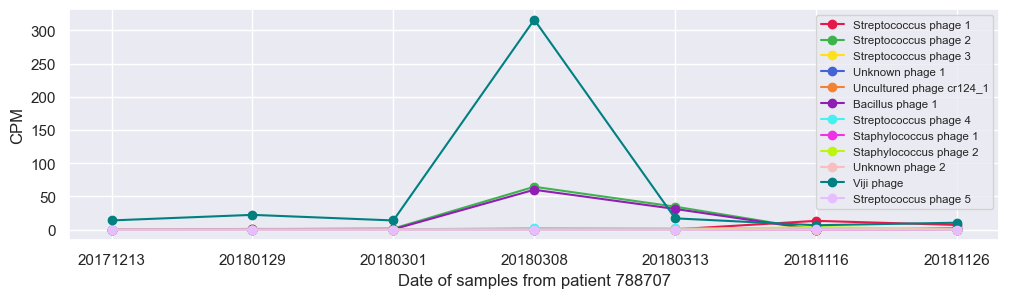

In [28]:
fig=plt.figure(figsize=(12,3))
ax=fig.add_subplot(111)

patient_id = 788707

for phage in phages:
    x, y = get_vals(patient_id, phage, coverage_df)
    ax.plot(x, y,  marker='o', color=mycolors[phages.index(phage)], label=phage_sp[phage]) 

# ax.set_ylim([-30, 500])

plt.xticks(range(len(x)), x)
plt.xlabel(f"Date of samples from patient {patient_id}")
plt.ylabel('CPM')
# ax.set_yscale('log')
ax.legend(fontsize='x-small')
plt.savefig(f"{project_path}{patient_id}_phage_cpm.png", format='png', dpi=300, bbox_inches='tight')


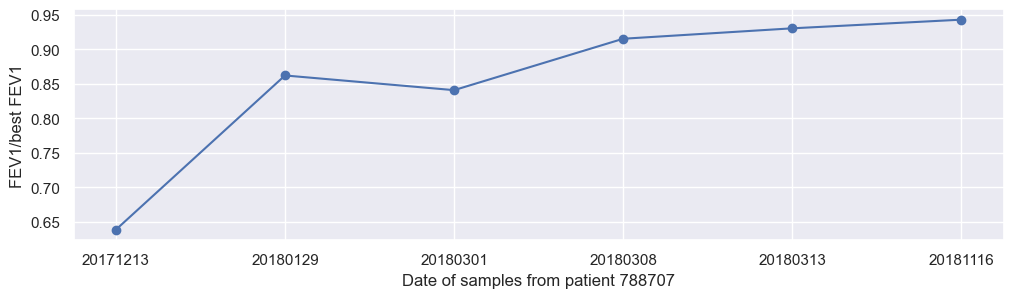

In [29]:
sample_names_of_interest = []

for date in x:
    patient_id_date = f"{patient_id}_{date}"
    sample_names_of_interest.append(patient_id_date)

x_vals = []

lf_df


present_sample_names_of_interest = {}

for index, row in lf_df.iterrows():
    
    my_id = "_".join(row['unique_ID'].split("_")[0:2])
#     print(my_id, row['unique_ID'], row['FEV1/best FEV1'])
    
    if my_id in sample_names_of_interest:
        x_vals.append(row['FEV1/best FEV1'])
        my_date = my_id.split("_")[1]
        present_sample_names_of_interest[my_date] = row['FEV1/best FEV1']
    
new_dict = dict(sorted(present_sample_names_of_interest.items(),  reverse = False))

x = list(new_dict.keys())
y = list(new_dict.values())

fig=plt.figure(figsize=(12,3))
ax=fig.add_subplot(111)

ax.plot(x, y,  marker='o')

plt.xlabel(f"Date of samples from patient {patient_id}")
plt.ylabel('FEV1/best FEV1')
plt.savefig(f"{project_path}{patient_id}_lung_func.png", format='png', dpi=300, bbox_inches='tight')


# Plot across patient 698917 

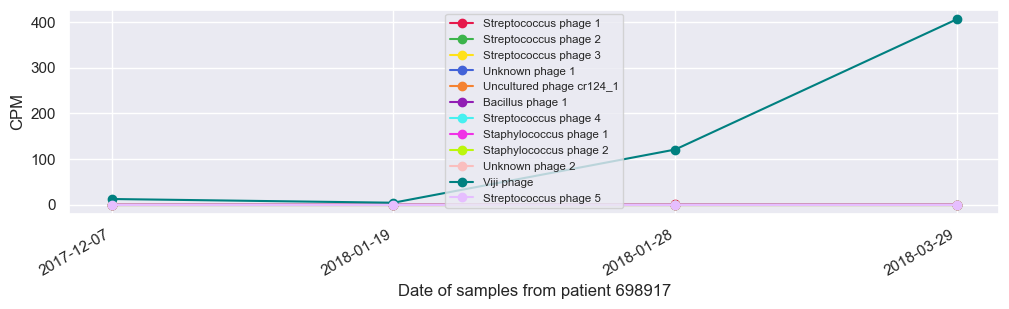

In [39]:
fig=plt.figure(figsize=(12,3))
ax=fig.add_subplot(111)

patient_id = 698917

for phage in phages:
    x, y = get_vals(patient_id, phage, coverage_df)
    ax.plot(x, y,  marker='o', color=mycolors[phages.index(phage)], label=phage_sp[phage]) 

# ax.set_ylim([-30, 500])

x_dates = [f"{d[0:4]}-{d[4:6]}-{d[6:8]}" for d in x]
plt.xticks(range(len(x_dates)), x_dates)
# ax.set_yscale('log')

plt.xlabel(f"Date of samples from patient {patient_id}")
plt.ylabel('CPM')
# ax.set_yscale('log')
ax.legend(fontsize='x-small')

plt.gcf().autofmt_xdate()

plt.savefig(f"{project_path}{patient_id}_phage_cpm.png", format='png', dpi=300, bbox_inches='tight')

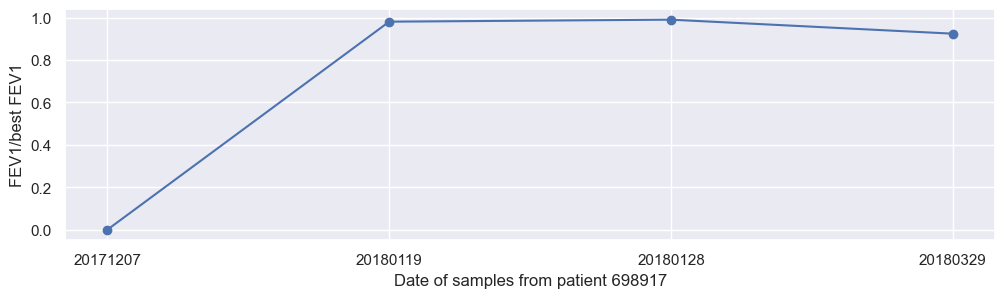

In [31]:
sample_names_of_interest = []

for date in x:
    patient_id_date = f"{patient_id}_{date}"
    sample_names_of_interest.append(patient_id_date)

x_vals = []

lf_df


present_sample_names_of_interest = {}

for index, row in lf_df.iterrows():
    
    my_id = "_".join(row['unique_ID'].split("_")[0:2])
#     print(my_id, row['unique_ID'], row['FEV1/best FEV1'])
    
    if my_id in sample_names_of_interest:
        x_vals.append(row['FEV1/best FEV1'])
        my_date = my_id.split("_")[1]
        present_sample_names_of_interest[my_date] = row['FEV1/best FEV1']
    
new_dict = dict(sorted(present_sample_names_of_interest.items(),  reverse = False))

x = list(new_dict.keys())
y = list(new_dict.values())

fig=plt.figure(figsize=(12,3))
ax=fig.add_subplot(111)

ax.plot(x, y,  marker='o')

plt.xlabel(f"Date of samples from patient {patient_id}")
plt.ylabel('FEV1/best FEV1')
plt.savefig(f"{project_path}{patient_id}_lung_func.png", format='png', dpi=300, bbox_inches='tight')


# Plot across patient 658355  

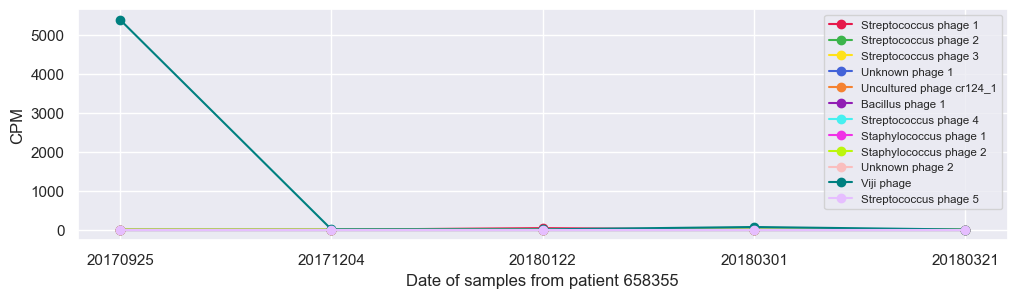

In [32]:
fig=plt.figure(figsize=(12,3))
ax=fig.add_subplot(111)

patient_id = 658355

x = []

for phage in phages:
    x, y = get_vals(patient_id, phage, coverage_df)
    ax.plot(x, y,  marker='o', color=mycolors[phages.index(phage)], label=phage_sp[phage]) 

# ax.set_ylim([-30, 5000])

plt.xticks(range(len(x)), x)
plt.xlabel(f"Date of samples from patient {patient_id}")
plt.ylabel('CPM')
# ax.set_yscale('log')
ax.legend(fontsize='x-small')
plt.savefig(f"{project_path}{patient_id}_phage_cpm.png", format='png', dpi=300, bbox_inches='tight')

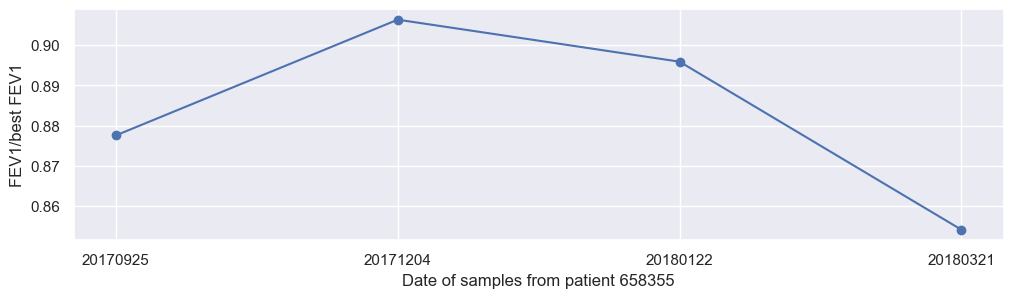

In [33]:
sample_names_of_interest = []

for date in x:
    patient_id_date = f"{patient_id}_{date}"
    sample_names_of_interest.append(patient_id_date)

x_vals = []

lf_df


present_sample_names_of_interest = {}

for index, row in lf_df.iterrows():
    
    my_id = "_".join(row['unique_ID'].split("_")[0:2])
#     print(my_id, row['unique_ID'], row['FEV1/best FEV1'])

    if my_id in sample_names_of_interest:
        x_vals.append(row['FEV1/best FEV1'])
        my_date = my_id.split("_")[1]
        present_sample_names_of_interest[my_date] = row['FEV1/best FEV1']
    
new_dict = dict(sorted(present_sample_names_of_interest.items(),  reverse = False))

x = list(new_dict.keys())
y = list(new_dict.values())

fig=plt.figure(figsize=(12,3))
ax=fig.add_subplot(111)

ax.plot(x, y,  marker='o')

plt.xlabel(f"Date of samples from patient {patient_id}")
plt.ylabel('FEV1/best FEV1')
plt.savefig(f"{project_path}{patient_id}_lung_func.png", format='png', dpi=300, bbox_inches='tight')


# Plot across patient 825012  

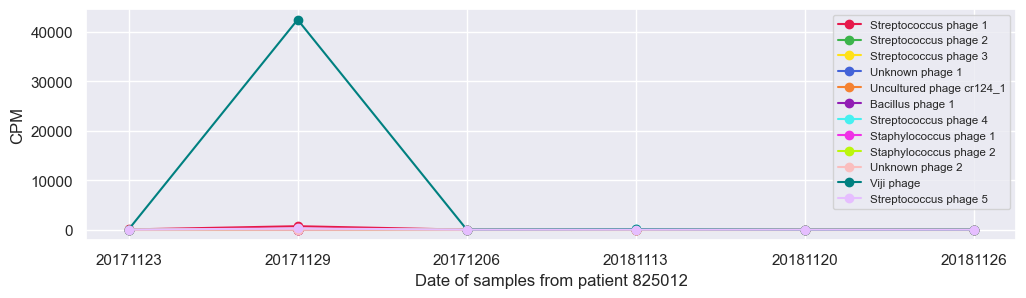

In [34]:
fig=plt.figure(figsize=(12,3))
ax=fig.add_subplot(111)

patient_id = 825012

for phage in phages:
    x, y = get_vals(patient_id, phage, coverage_df)
    ax.plot(x, y,  marker='o', color=mycolors[phages.index(phage)], label=phage_sp[phage]) 

# ax.set_ylim([-30, 5000])

plt.xticks(range(len(x)), x)
plt.xlabel(f"Date of samples from patient {patient_id}")
plt.ylabel('CPM')
# ax.set_yscale('log')
ax.legend(fontsize='x-small')
plt.savefig(f"{project_path}{patient_id}_phage_cpm.png", format='png', dpi=300, bbox_inches='tight')

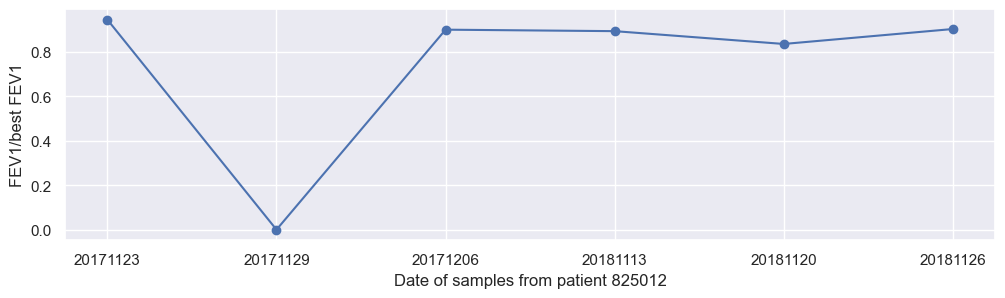

In [35]:
sample_names_of_interest = []

for date in x:
    patient_id_date = f"{patient_id}_{date}"
    sample_names_of_interest.append(patient_id_date)

x_vals = []

lf_df


present_sample_names_of_interest = {}

for index, row in lf_df.iterrows():
    
    my_id = "_".join(row['unique_ID'].split("_")[0:2])
#     print(my_id, row['unique_ID'], row['FEV1/best FEV1'])
    
    if my_id in sample_names_of_interest:
        x_vals.append(row['FEV1/best FEV1'])
        my_date = my_id.split("_")[1]
        present_sample_names_of_interest[my_date] = row['FEV1/best FEV1']
    
new_dict = dict(sorted(present_sample_names_of_interest.items(),  reverse = False))

x = list(new_dict.keys())
y = list(new_dict.values())

fig=plt.figure(figsize=(12,3))
ax=fig.add_subplot(111)

ax.plot(x, y,  marker='o')

plt.xlabel(f"Date of samples from patient {patient_id}")
plt.ylabel('FEV1/best FEV1')
plt.savefig(f"{project_path}{patient_id}_lung_func.png", format='png', dpi=300, bbox_inches='tight')


# Plot across patient 1128691  

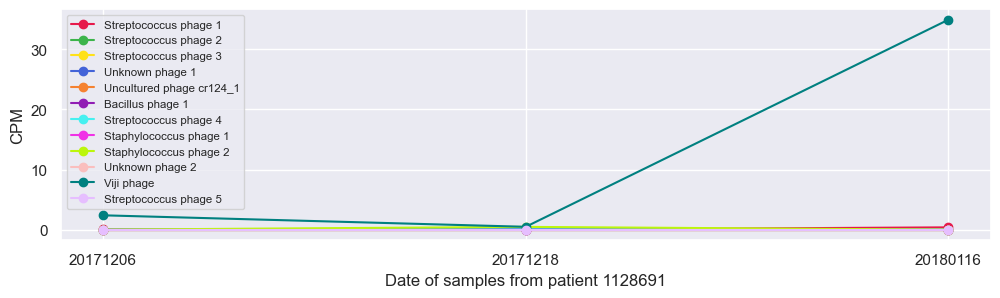

In [36]:
fig=plt.figure(figsize=(12,3))
ax=fig.add_subplot(111)

patient_id = 1128691

for phage in phages:
    x, y = get_vals(patient_id, phage, coverage_df)
    ax.plot(x, y,  marker='o', color=mycolors[phages.index(phage)], label=phage_sp[phage]) 

# ax.set_ylim([-30, 5000])

plt.xticks(range(len(x)), x)
plt.xlabel(f"Date of samples from patient {patient_id}")
plt.ylabel('CPM')
# ax.set_yscale('log')
ax.legend(fontsize='x-small')
plt.savefig(f"{project_path}{patient_id}_phage_cpm.png", format='png', dpi=300, bbox_inches='tight')

## Lung function

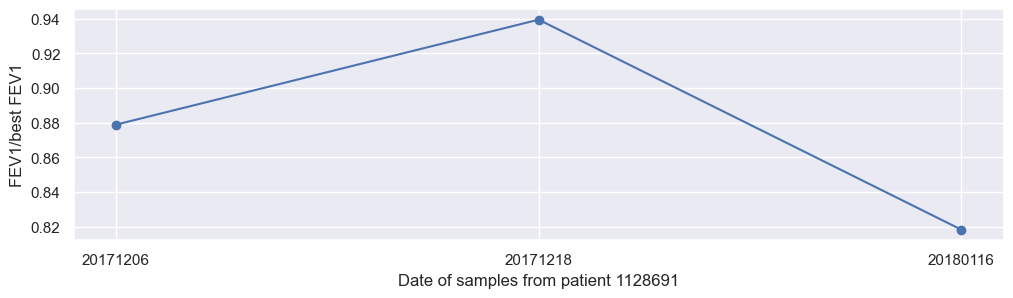

In [37]:
sample_names_of_interest = []

for date in x:
    patient_id_date = f"{patient_id}_{date}"
    sample_names_of_interest.append(patient_id_date)

x_vals = []

lf_df


present_sample_names_of_interest = {}

for index, row in lf_df.iterrows():
    
    my_id = "_".join(row['unique_ID'].split("_")[0:2])
#     print(my_id, row['unique_ID'], row['FEV1/best FEV1'])
    
    if my_id in sample_names_of_interest:
        x_vals.append(row['FEV1/best FEV1'])
        my_date = my_id.split("_")[1]
        present_sample_names_of_interest[my_date] = row['FEV1/best FEV1']
    
new_dict = dict(sorted(present_sample_names_of_interest.items(),  reverse = False))

x = list(new_dict.keys())
y = list(new_dict.values())

fig=plt.figure(figsize=(12,3))
ax=fig.add_subplot(111)

ax.plot(x, y,  marker='o')

plt.xlabel(f"Date of samples from patient {patient_id}")
plt.ylabel('FEV1/best FEV1')
plt.savefig(f"{project_path}{patient_id}_lung_func.png", format='png', dpi=300, bbox_inches='tight')
